In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [8]:
data = pd.read_csv('hog/hog_data_test.csv')
X = data.drop('label', axis=1).values
Y = data['label']
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1))
Y = Y.ravel()

In [14]:
train = pd.read_csv('hog/hog_data_train.csv')
X_train = train.drop('label', axis=1).values
Y_train = train['label']
Y_train = encoder.transform(np.array(Y_train).reshape(-1,1))
Y_train = Y_train.ravel()

In [17]:
import matplotlib.pyplot as plt
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
sfm = SelectFromModel(forest, threshold=0.0001, prefit=True)
X_selected = sfm.transform(X)


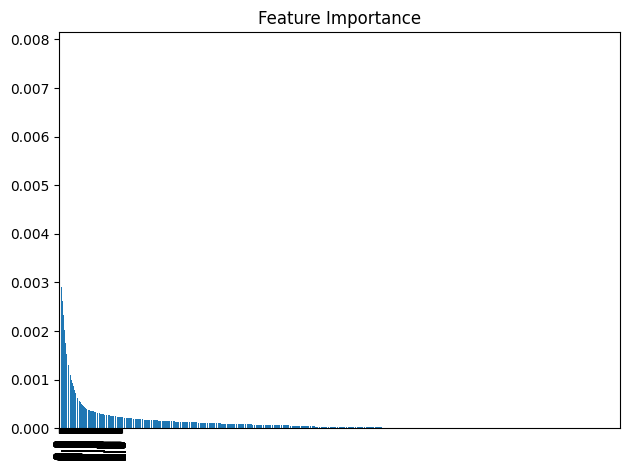

In [18]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[0]),Y_train, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

trop de critaire n ont pas d importance sur le model donc j opte a utiliser une serie de convolution et de max pooling pour reduire la dimentionalite 

In [39]:
X_experiment = []


kernel = np.ones(3)  
pool_size = 2       

for raw in X_train:
    
    raw = raw.flatten()
    
    for _ in range(4):  
        
        raw = np.convolve(raw, kernel, mode='valid')
        
        
        raw = np.array([max(raw[i:i + pool_size]) for i in range(0, len(raw), pool_size)])
    
    
    X_experiment.append(raw)


X_experiment = np.array(X_experiment)


In [41]:
X_test_experiment = []

for raw in X:
    
    raw = raw.flatten()
    
    for _ in range(4):  
        
        raw = np.convolve(raw, kernel, mode='valid')
        
        
        raw = np.array([max(raw[i:i + pool_size]) for i in range(0, len(raw), pool_size)])
    
    
    X_test_experiment.append(raw)
X_test_experiment = np.array(X_test_experiment)

In [45]:
forest2 = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=0, n_jobs=-1)
forest2.fit(X_experiment, Y_train)
importances2 = forest2.feature_importances_
indices2 = np.argsort(importances2)[::-1]
#sfm2 = SelectFromModel(forest2, threshold=0.001, prefit=True) # this deemed useless since for it do something the threshhold must be greater than 0.001 which is too high
#X_selected2 = sfm2.transform(X_experiment)

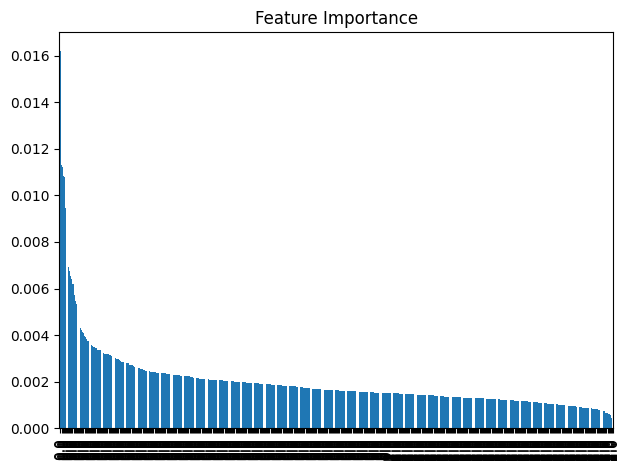

In [47]:
plt.title('Feature Importance')
plt.bar(range(X_experiment.shape[1]),importances2[indices2],align='center')
plt.xticks(range(X_experiment.shape[0]),Y_train, rotation=90)
plt.xlim([-1, X_experiment.shape[1]])
plt.tight_layout()
plt.show()

we already at 50X features and it seems like we can no longer reduce the dimentionality since all the features seems to have a significance

In [49]:
# now let's write the data to csv files
data_train = pd.DataFrame(X_experiment)
data_train['label'] = encoder.inverse_transform(Y_train.reshape(-1, 1)).ravel()
data_train.to_csv('hog/hog_data_train_experiment.csv', index=False)
data_test = pd.DataFrame(X_test_experiment)
data_test['label'] = encoder.inverse_transform(Y.reshape(-1, 1)).ravel()
data_test.to_csv('hog/hog_data_test_experiment.csv', index=False)